In [1]:
import pandas as pd
import seaborn as sns
import jsonlines

In [2]:
def add_rolling_mean(df, columns, window, groupby, sortby):
    rolling = df.sort_values(sortby).groupby(groupby)[columns].rolling(window=window).mean()
    rolling.index = rolling.index.droplevel(level=0)
    rolling_columns = [f'{c}_rolling' for c in columns]
    df[rolling_columns] = rolling
    return df

In [3]:
df = pd.read_parquet('../runs/heuristic_tabular/tabular_vs_heuristic_1/metrics.parquet')

In [4]:
df.head(2)

label.batch label.controller_args label.eps label.networktype  \
0  tabular_vs_heuristic_1             settings2     decay           cycle64   
1  tabular_vs_heuristic_1             settings2     decay           cycle64   

  label.project   label.rewards  _step  episode   mode  episode_step  ...  \
0      ai_vs_ci  mixed_zero_sum      0        0  train             0  ...   
1      ai_vs_ci  mixed_zero_sum      0        0  train             0  ...   

   agent_type           rowtype                   createdAt avg_reward  \
0          ci             trace  2020-07-27T15:43:49.482642  -0.166667   
1          ci  individual_trace  2020-07-27T15:43:49.482726        NaN   

  avg_episode_rewards coordinations   rewards  episode_rewards  agent  catches  
0           -0.166667           0.0       NaN              NaN   None      NaN  
1                 NaN           NaN -0.083333        -0.083333      A      NaN  

[2 rows x 23 columns]

In [5]:
len(df)

7041600

In [6]:
df.columns

Index(['label.batch', 'label.controller_args', 'label.eps',
       'label.networktype', 'label.project', 'label.rewards', '_step',
       'episode', 'mode', 'episode_step', 'ai_eps', 'ci_eps', 'done',
       'agent_type', 'rowtype', 'createdAt', 'avg_reward',
       'avg_episode_rewards', 'coordinations', 'rewards', 'episode_rewards',
       'agent', 'catches'],
      dtype='object')

In [12]:
label_columns = ['label.batch', 'label.controller_args', 'label.eps',
       'label.networktype', 'label.project', 'label.rewards']

In [9]:
print(df['label.controller_args'].unique())
print(df['label.networktype'].unique())
print(df['label.eps'].unique())
print(df['label.rewards'].unique())

['settings2' 'settings5' 'settings6' 'settings4' 'settings1' 'settings3']
['cycle64']
['decay']
['mixed_zero_sum' 'local' 'global' 'mixed']


In [9]:
# eps_order = ['fixed0.05', 'fixed0.10', 'fixed0.20', 'decay']
# networktype_order = ['full2', 'full3', 'full4', 'full5', 'cycle62', 'cycle64']


In [10]:
dft = df[~df['avg_reward'].isnull()].copy()

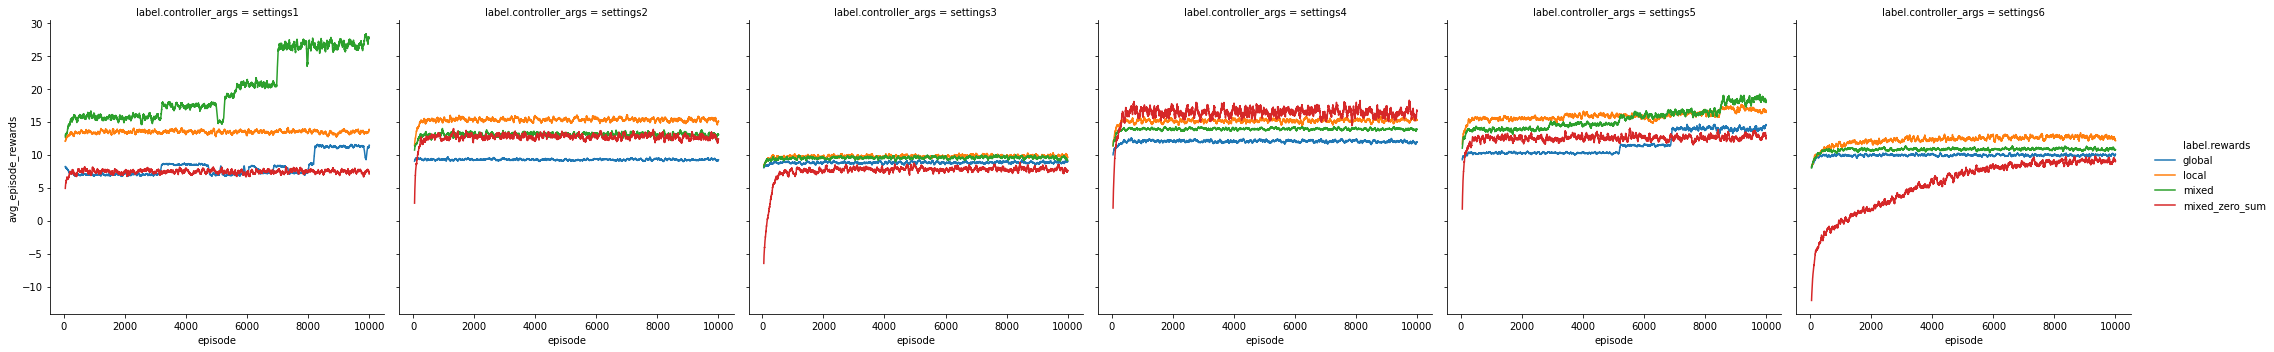

In [16]:
dfd = dft[dft['done'] & (dft["agent_type"] == 'ci') & (dft["mode"] == 'train')].copy()

columns = ['avg_episode_rewards']
window = 50
groupby = label_columns # + ['mode']
sortby = 'episode'

dfrm = dfd.groupby(groupby).rolling(on=sortby, window=window)[columns].mean().reset_index()
# row_order=eps_order, col_order=networktype_order,row='label.rewards',
sns.relplot(
    data=dfrm, x='episode', y='avg_episode_rewards',  col="label.controller_args",  
    hue="label.rewards", kind="line",  ci=None)

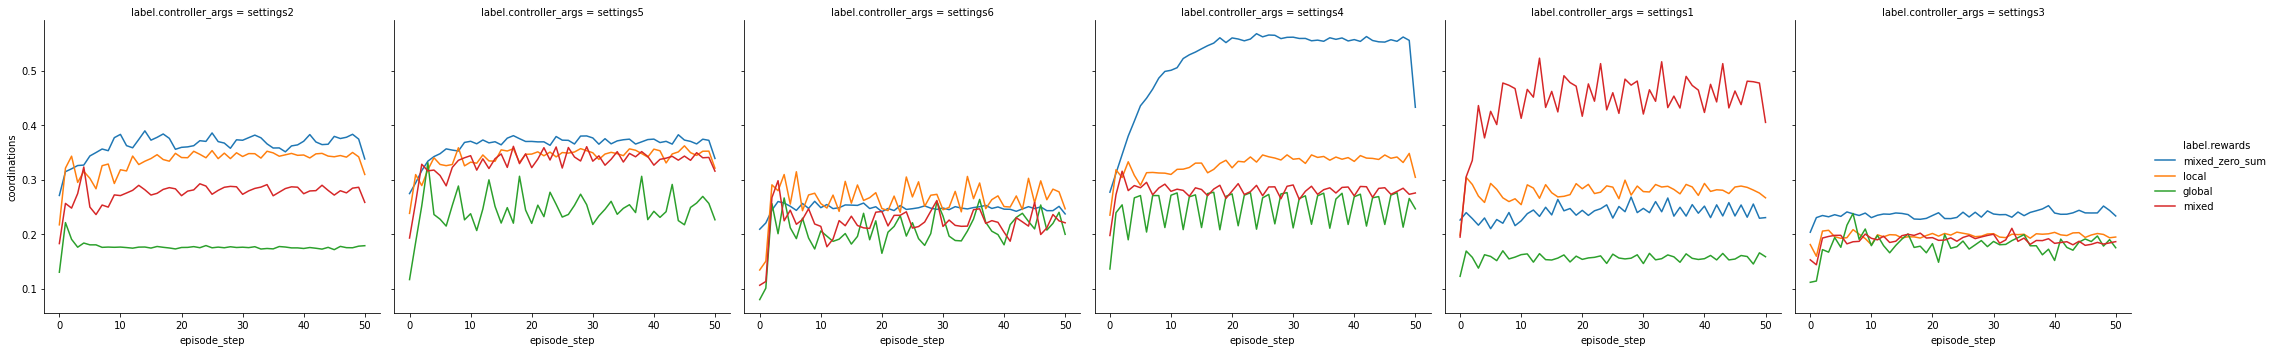

In [17]:
dfts = dft[(dft["agent_type"] == 'ci')]


sns.relplot(
    data=dfts, x='episode_step', y='coordinations',  col="label.controller_args",  
    hue="label.rewards", kind="line",  ci=None)

# sns.relplot(
#     data=dfts, x='episode_step', y='coordinations', row='label.eps', style='mode', col="label.networktype",  
#     hue="label.self_weight", kind="line", row_order=eps_order, col_order=networktype_order, ci=None)

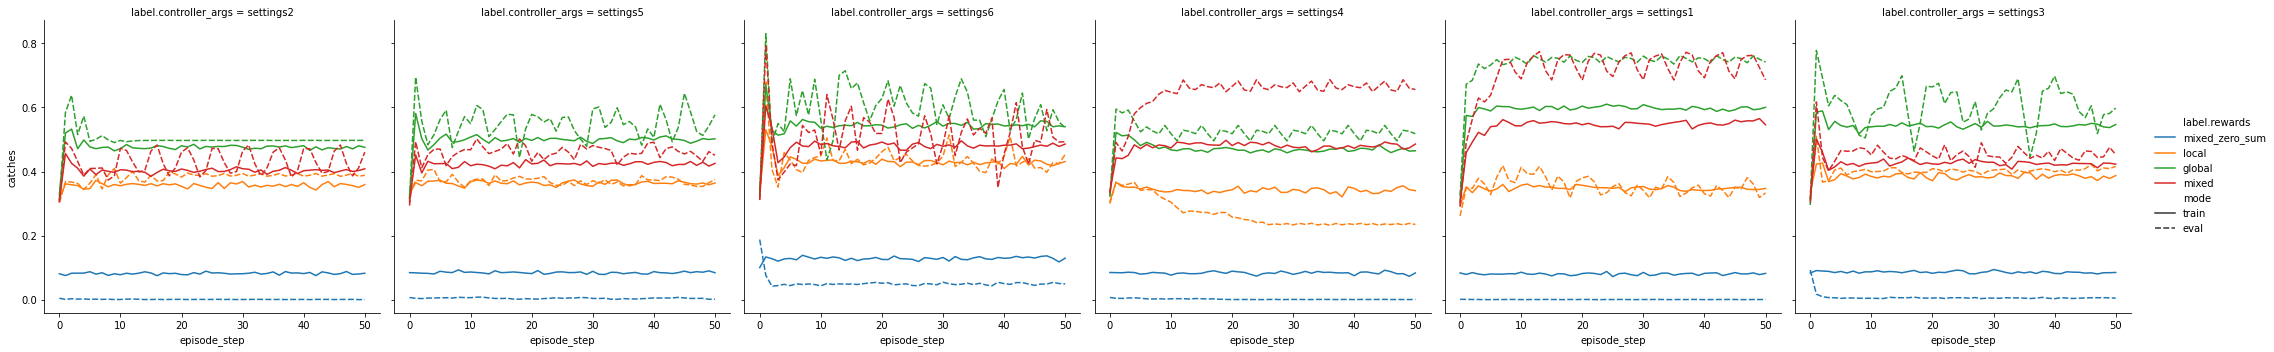

In [19]:
dfts = dft[(dft["agent_type"] == 'ai')]
sns.relplot(
    data=dfts, x='episode_step', y='catches', style='mode',  col="label.controller_args",  
    hue="label.rewards", kind="line", ci=None)

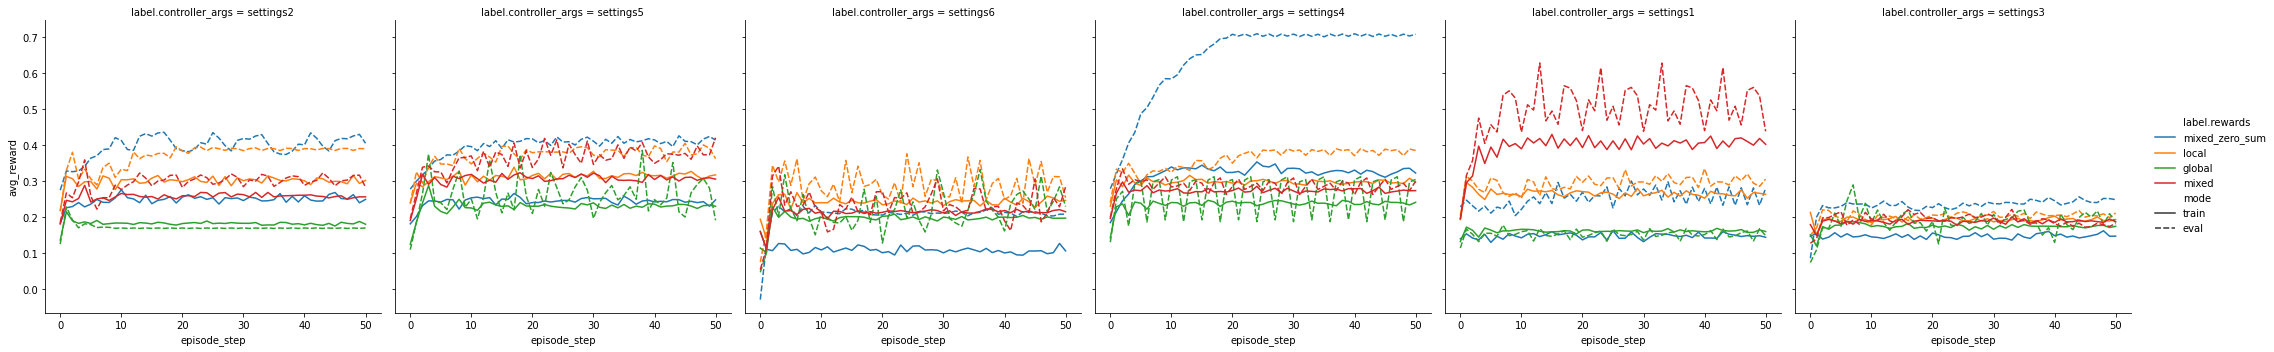

In [21]:
dfts = dft[(dft["agent_type"] == 'ci')]
sns.relplot(
    data=dfts, x='episode_step', y='avg_reward', style='mode',  col="label.controller_args",  
    hue="label.rewards", kind="line", ci=None)

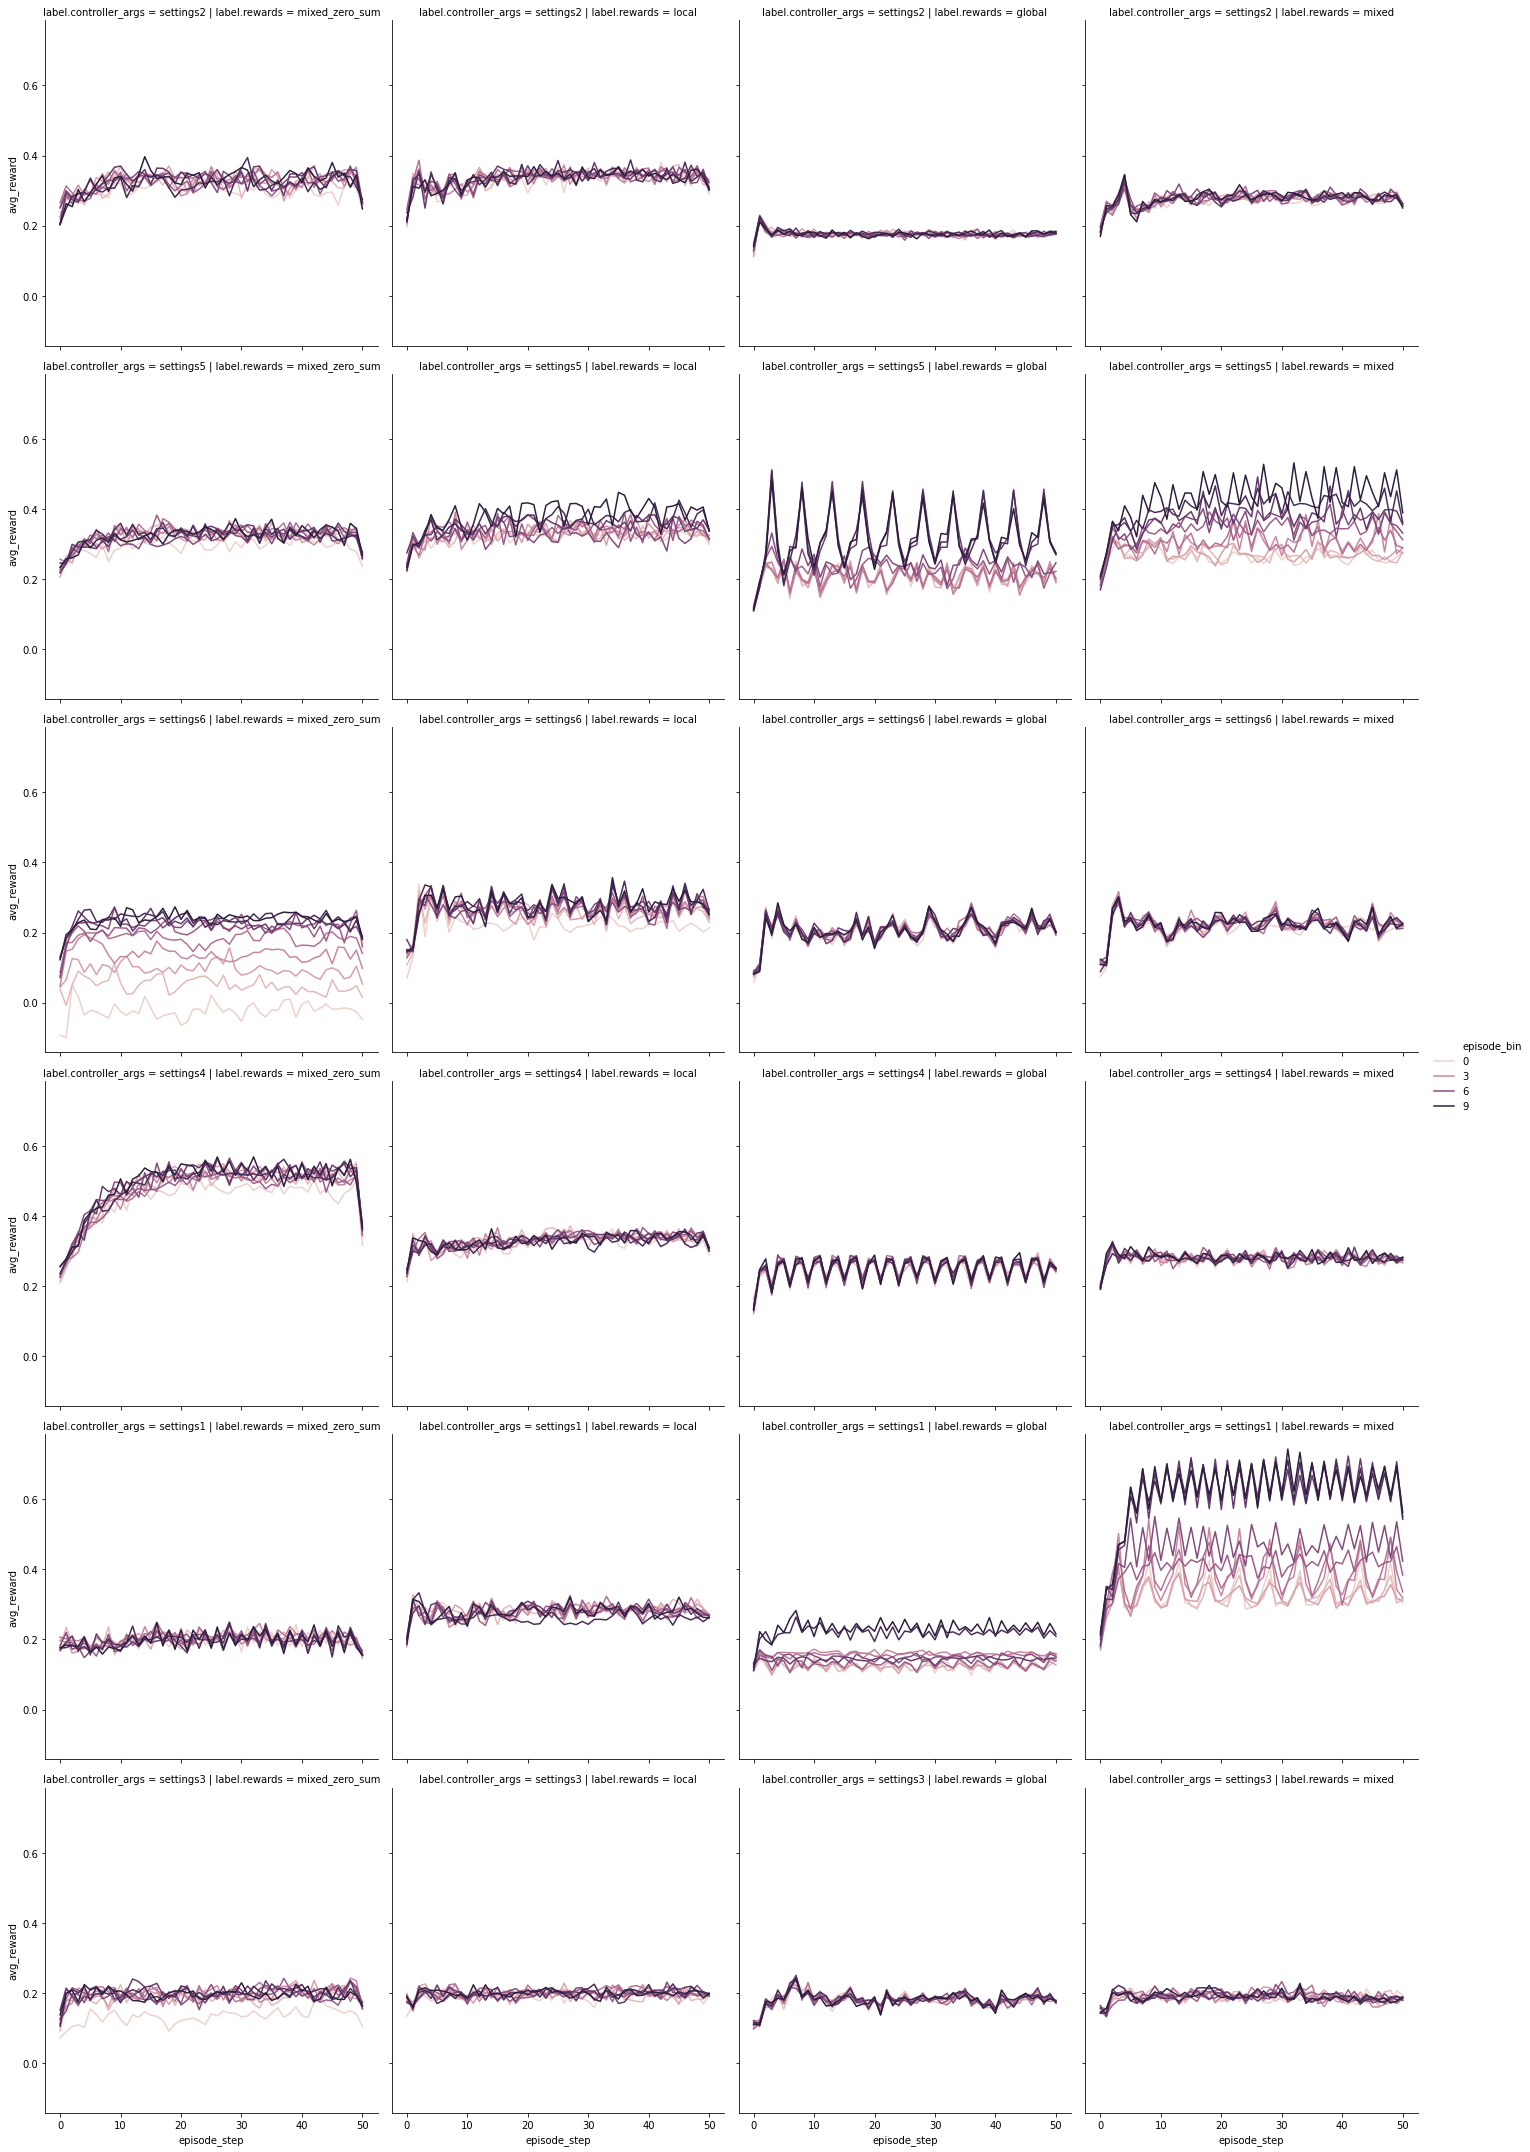

In [22]:
dfts = dft[(dft["agent_type"] == 'ci')]

dfts['episode_bin'] = dfts['episode'] // ((dfts['episode'].max() + 1) // 10)
dftss = dfts[(dfts['mode'] == 'train')]

sns.relplot(
    data=dfts, x='episode_step', y='avg_reward', row='label.controller_args', col="label.rewards",  
    hue="episode_bin", kind="line", ci=None)

to be done: individual agent rewards